# P2  Analyse des données des systèmes éducatifs

### Contexte  :
Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.
Notre mission est de réaliser une pré-analyse exploratoire permettant de répondre aux interrogations suivantes : 

1- Quels sont les pays avec un fort potentiel de clients pour nos services ?

2- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?

3- Dans quels pays l'entreprise doit-elle opérer en priorité ?

# Démarche :

Dans un premier temps nous allons explorer les données (les 5 fichiers de la banque mondiale), suite à cette démarche nous pourons effectuer une première étape de nétoyage.  
Viendra ensuite le moment crussial de la selection des indicateur, il faut qu'ils soient à la fois pertinent (en accord avec la problématique) et répresentatifs (disponibles pour un large nombre de pays)  
Une fois les indicateurs identifiés nous construirons un score représentant le potentiel des pays dans lesquels l'entreprise doit opérer en priorité  


# Première partie : Découverte des fichiers

In [1]:
# importation des librairies utiles 
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)


In [2]:
# Lecture des fichiers


EdStatsContry = pd.read_csv("C:/Users/pouru/OneDrive/Documents/Road2DataScience/OCProjets/Projet1/data/EdStatsCountry.csv")
EdStatsContry_series = pd.read_csv("C:/Users/pouru/OneDrive/Documents/Road2DataScience/OCProjets/Projet1/data/EdStatsCountry-Series.csv")
EdStatsFootNote = pd.read_csv("C:/Users/pouru/OneDrive/Documents/Road2DataScience/OCProjets/Projet1/data/EdStatsFootNote.csv")
EdStatsSeries = pd.read_csv("C:/Users/pouru/OneDrive/Documents/Road2DataScience/OCProjets/Projet1/data/EdStatsSeries.csv")
EdStatsData = pd.read_csv("C:/Users/pouru/OneDrive/Documents/Road2DataScience/OCProjets/Projet1/data/EdStatsData.csv")


## 1.1 EdStatsContry 

### Un premier apperçu

In [3]:

print(f'le jeu de donnees contient {EdStatsContry.shape[0]} lignes et {EdStatsContry.shape[1]} colonnes')
EdStatsContry.head(2)

le jeu de donnees contient 241 lignes et 32 colonnes


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [4]:
# Nous listons les noms des colonnes car elles ne sont pas toutes visibles avec le type de données
print(EdStatsContry.dtypes)

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [5]:
# Description des valeurs quantitatives
EdStatsContry.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [6]:
# Description des valeurs qualitative
EdStatsContry.describe(exclude=[np.number])

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,205,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,179
unique,241,241,241,241,238,152,131,7,5,240,43,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,20
top,BRN,Dominican Republic,Dominican Republic,United Kingdom of Great Britain and Northern Ireland,BT,Euro,"April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.",Europe & Central Asia,Upper middle income,BT,2005,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accounts methodology.,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 2012",Yes,2010,2000
freq,1,1,1,1,1,23,6,57,55,1,34,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,40


### Valeurs dupliquées et manquantes

In [7]:
print(f'Le nombre de lignes dupliquées est : {EdStatsContry[EdStatsContry.duplicated()].shape[0]}')

Le nombre de lignes dupliquées est : 0


In [8]:
tot_val = EdStatsContry.shape[0]*EdStatsContry.shape[1]
print(f'Le total des Valeurs manquantes est {EdStatsContry.isna().sum().sum()}\
soit {EdStatsContry.isna().sum().sum()/tot_val*100} %')
missVal = pd.DataFrame(EdStatsContry.isna().sum(), columns = ['Valeurs manquantes'])
missVal[' % Valeurs manquantes'] = EdStatsContry.isna().sum()/EdStatsContry.shape[0]*100
missVal

Le total des Valeurs manquantes est 2354soit 30.52385892116183 %


,Valeurs manquantes,% Valeurs manquantes
Country Code,0,0.000000
Short Name,0,0.000000
Table Name,0,0.000000
Long Name,0,0.000000
2-alpha code,3,1.244813
Currency Unit,26,10.788382
Special Notes,96,39.834025
Region,27,11.203320
Income Group,27,11.203320
WB-2 code,1,0.414938


### informations inportantes : 

In [9]:
EdStatsContry['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

### Visualisations

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de pays par Région')

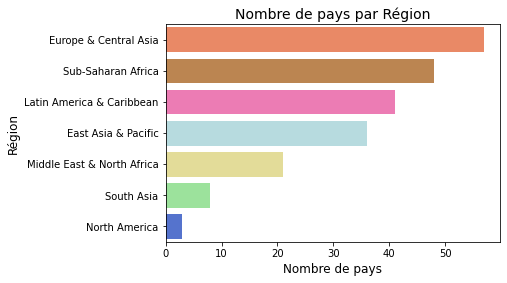

In [10]:
nb_pays_par_region=EdStatsContry.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['Coral','Peru','HotPink','PowderBlue','Khaki','LightGreen','RoyalBlue','Cyan']
sns.barplot(nb_pays_par_region['Short Name'].sort_values(), nb_pays_par_region['Region'], palette=colors,)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Nombre de pays par Région', fontsize=14)

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de pays par groupe de revenu')

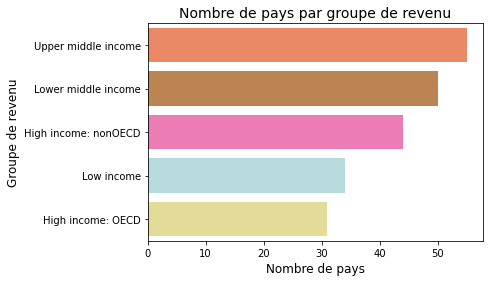

In [91]:
nb_pays_par_income=EdStatsContry.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['Coral','Peru','HotPink','PowderBlue','Khaki','LightGreen','RoyalBlue','Cyan']
sns.barplot(nb_pays_par_income['Short Name'].sort_values(), nb_pays_par_income['Income Group'], palette=colors,)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenu', fontsize=12)
plt.title('Nombre de pays par groupe de revenu', fontsize=14)

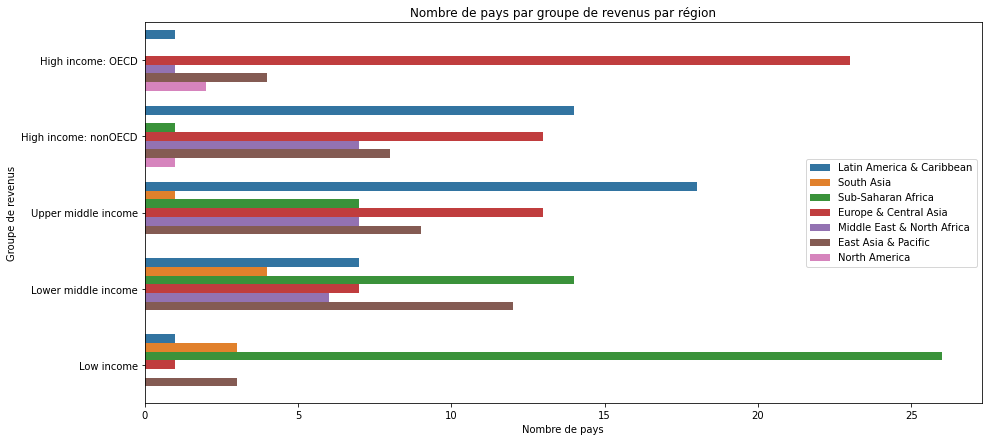

In [12]:
# Regroupement des pays par groupe de revenus et par region

plt.figure(figsize=(15,7))

sns.countplot(y='Income Group', hue='Region', data=EdStatsContry, orient='h',
              order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'])

plt.xlabel('Nombre de pays')
plt.ylabel('Groupe de revenus')
plt.legend()
plt.title('Nombre de pays par groupe de revenus par région')
plt.grid(False)

plt.show()

### Conclusions sur la partie exploratoire : EdStatsContry
- Le Dataframe EdStatsContry nous informe sur la condition economique de 241 pays répartis entre 7 régions du monde. Le facteur le plus réprésentatif est "l'income group"
- Les dates des dernières mises à jour sont également founies
- La colonne 'Unnamed: 31' est inutile et doit être supprimée elle contitent uniquement des données nulles
- il n'y a pas de ligne dupliquée, mais il manque 2354 valeurs (30.5%)
- le jeu de donnees contient 241 lignes et 32 colonnes.

## 1.2 EdStatsContry_series

### Description générale 

In [13]:
print(f'le jeu de donnees contient {EdStatsContry_series.shape[0]} lignes et {EdStatsContry_series.shape[1]} colonnes')
EdStatsContry_series.head(5)

le jeu de donnees contient 613 lignes et 4 colonnes


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


In [14]:
EdStatsContry_series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [15]:
# Description des valeurs qualitative
EdStatsContry_series.describe(exclude=[np.number])

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,GEO,SP.POP.TOTL,Data sources : United Nations World Population Prospects
freq,18,211,154


### duplications et valeurs manquantes

In [16]:
print(f'Le nombre de lignes dupliquées est : {EdStatsContry_series[EdStatsContry_series.duplicated()].shape[0]}')

Le nombre de lignes dupliquées est : 0


In [17]:
tot_val = EdStatsContry_series.shape[0]*EdStatsContry_series.shape[1]


print(f'Le total des Valeurs manquantes est {EdStatsContry_series.isna().sum().sum()} \
soit {EdStatsContry_series.isna().sum().sum()/tot_val*100} %')
missVal = pd.DataFrame(EdStatsContry_series.isna().sum(), columns = ['Valeurs manquantes'])
missVal[' % Valeurs manquantes'] = EdStatsContry_series.isna().sum()/EdStatsContry_series.shape[0]*100
missVal

Le total des Valeurs manquantes est 613 soit 25.0 %


,Valeurs manquantes,% Valeurs manquantes
CountryCode,0,0.0
SeriesCode,0,0.0
DESCRIPTION,0,0.0
Unnamed: 3,613,100.0


In [18]:
# on affiche les valeurs de EdStatsContry_series['CountryCode'] qui ne sont pas dans EdStatsContry['Country Code']
print(EdStatsContry_series[~EdStatsContry_series['CountryCode'].isin(EdStatsContry['Country Code'])][['CountryCode']].sort_values(by = 'CountryCode'))

Empty DataFrame
Columns: [CountryCode]
Index: []


In [19]:
# on affiche les valeurs de EdStatsContry['Country Code'] qui ne sont pas dans EdStatsContry_series['CountryCode'] 
print(EdStatsContry[~EdStatsContry['Country Code'].isin(EdStatsContry_series['CountryCode'])][['Short Name']].sort_values(by = 'Short Name'))

                                         Short Name
5                                        Arab World
47                                          Curaçao
58          East Asia & Pacific (all income levels)
57            East Asia & Pacific (developing only)
63                                        Euro area
60        Europe & Central Asia (all income levels)
59          Europe & Central Asia (developing only)
68                                   European Union
92           Heavily indebted poor countries (HIPC)
89                                      High income
122   Latin America & Caribbean (all income levels)
116     Latin America & Caribbean (developing only)
123    Least developed countries: UN classification
128                             Low & middle income
124                                      Low income
127                             Lower middle income
140  Middle East & North Africa (all income levels)
148    Middle East & North Africa (developing only)
143         

### Visualisation 

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de pays par série')

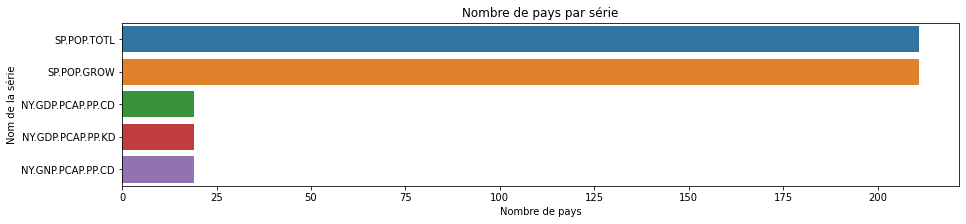

In [101]:
plt.figure(figsize=(15,3))

nb_pays_par_serie=EdStatsContry_series.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode', ascending=False)
sns.barplot(nb_pays_par_serie['CountryCode'][:5], nb_pays_par_serie['SeriesCode'][:5])
plt.xlabel('Nombre de pays')
plt.ylabel('Nom de la série')
plt.title('Nombre de pays par série')

In [21]:
# les deux series les mieux représentés ici sont : SP.POP.TOTL et SP.POP.GROW 

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'EdStatsContry_series : Top 5 Sources par nombre de pays ')

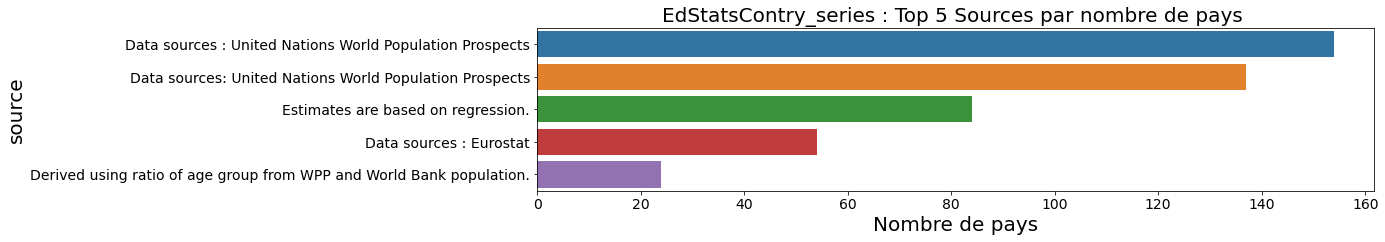

In [126]:
plt.figure(figsize=(15,3))

nb_pays_par_sources=EdStatsContry_series.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode', ascending=False)

sns.barplot(nb_pays_par_sources['CountryCode'][:5], nb_pays_par_sources['DESCRIPTION'][:5])
plt.xlabel('Nombre de pays',fontsize=20)
plt.ylabel('source',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('EdStatsContry_series : Top 5 Sources par nombre de pays ',fontsize=20)

##### Notons ici que Les deux sources dans le top sont identiques nous allons les rassembler

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'EdStatsContry_series : Top 5 Sources par nombre de Pays')

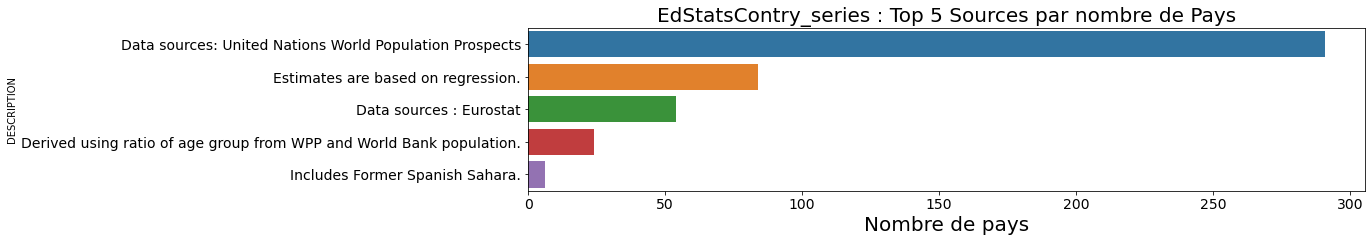

In [127]:
plt.figure(figsize=(15,3))


nb_pays_par_sources=EdStatsContry_series.groupby('DESCRIPTION')[['CountryCode']].count().sort_values(by='CountryCode', ascending=False)
nb_pays_par_sources.iloc[1] = nb_pays_par_sources.iloc[0] + nb_pays_par_sources.iloc[1]
nb_pays_par_sources = nb_pays_par_sources.reset_index()

sns.barplot(nb_pays_par_sources['CountryCode'][1:6], nb_pays_par_sources['DESCRIPTION'][1:6])
plt.xlabel('Nombre de pays',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('EdStatsContry_series : Top 5 Sources par nombre de Pays',fontsize=20)

## Conclusions 
- Le jeu de données contient les références des sources de certaines series selon les pays avec un code tu type : "SP.POP.TOTL". Il y a 21 types de série différent.
- le jeu de donnees contient 613 lignes et 4 colonnes
- la denière colonne sera à supprimer, les autres sont bien pleines.
- Tous les codes des pays sont présents dans EdStatsContry. Les pays de EdStatsContry que ne sont pas dans EdStatsContry_series ne sont en fait pas des pays : régions, groupe de revenue...

## 1.3 EdStatsFootNote

In [23]:
print(f'le jeu de donnees contient {EdStatsFootNote.shape[0]} lignes et {EdStatsFootNote.shape[1]} colonnes')
EdStatsFootNote.head(3)

le jeu de donnees contient 643638 lignes et 5 colonnes


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [24]:
EdStatsFootNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [25]:
EdStatsFootNote.describe(exclude=[np.number])

,CountryCode,SeriesCode,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,YR2004,Country Data
freq,7320,9226,27128,191188


### Duplications et valeurs manquantes

In [26]:
print(f'Le nombre de lignes dupliquées est : {EdStatsFootNote[EdStatsFootNote.duplicated()].shape[0]}')

Le nombre de lignes dupliquées est : 0


In [27]:
tot_val = EdStatsFootNote.shape[0]*EdStatsFootNote.shape[1]

print(f'Le total des Valeurs manquantes est {EdStatsFootNote.isna().sum().sum()} \
soit {EdStatsFootNote.isna().sum().sum()/tot_val*100} %')
missVal = pd.DataFrame(EdStatsFootNote.isna().sum(), columns = ['Valeurs manquantes'])
missVal[' % Valeurs manquantes'] = EdStatsFootNote.isna().sum()/EdStatsFootNote.shape[0]*100
missVal

Le total des Valeurs manquantes est 643638 soit 20.0 %


,Valeurs manquantes,% Valeurs manquantes
CountryCode,0,0.0
SeriesCode,0,0.0
Year,0,0.0
DESCRIPTION,0,0.0
Unnamed: 4,643638,100.0


### Modifications 

- Modification du format date YRXXXX -> XXXX

In [28]:
EdStatsFootNote['Year']=[row[-4:] for row in EdStatsFootNote['Year']]

- Supprimmer la colonne Unnamed : 4

In [29]:
EdStatsFootNote.drop(columns =['Unnamed: 4'], inplace = True)

### Visualisations

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'EdStatsFootNote : Nombre de séries par année')

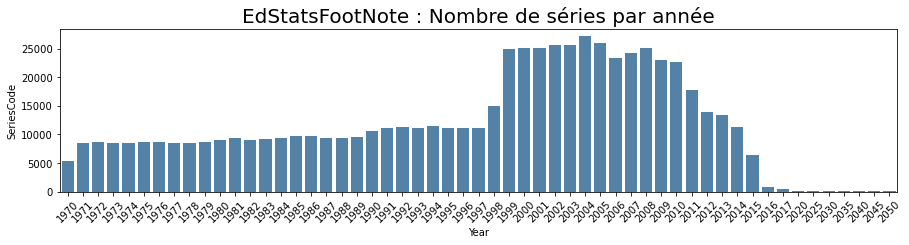

In [131]:
plt.figure(figsize=(15,3))

nb_series_par_an = EdStatsFootNote.groupby('Year')[['SeriesCode']].count().reset_index()
sns.barplot(nb_series_par_an['Year'], nb_series_par_an['SeriesCode'],color='SteelBlue')
plt.xticks(rotation=45)
plt.title('EdStatsFootNote : Nombre de séries par année',fontsize=20)

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de pays par série : Top 5')

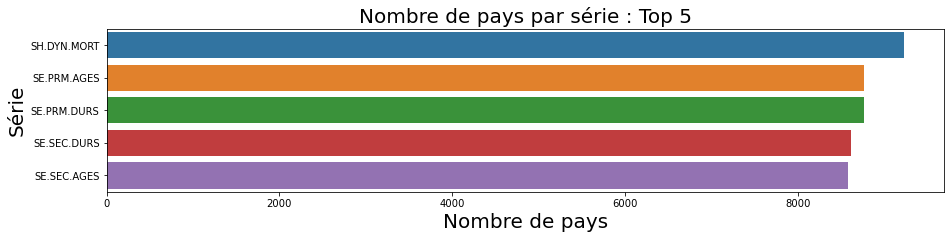

In [104]:
plt.figure(figsize=(15,3))

nb_pays_par_serie=EdStatsFootNote.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode', ascending=False)
sns.barplot(nb_pays_par_serie['CountryCode'][:5], nb_pays_par_serie['SeriesCode'][:5])
plt.xlabel('Nombre de pays',fontsize=20)
plt.ylabel('Série',fontsize=20)
plt.title('Nombre de pays par série : Top 5',fontsize=20)

### Conclusion :
- En fonction des pays et des series nous avons toutes les dates ou il y a eu une actualisation des données. Il y a aussi une description selon la provenance.
- le jeu de donnees contient 643638 lignes et 5 colonnes
- toutes les données sont présentes sauf pour la colonne "Unnamed: 4 " qui a été suprimée.
- les "YR" devant les années sont enlevés pour plus de lisibilité

## 1.4  EdStatsSeries

### Description générale

In [32]:
print(f'le jeu de donnees contient {EdStatsSeries.shape[0]} lignes et {EdStatsSeries.shape[1]} colonnes')
EdStatsSeries.head(3)

le jeu de donnees contient 3665 lignes et 21 colonnes


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Variables qualitatives
EdStatsSeries.describe(exclude=[np.number])

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
count,3665,3665,3665,2156,3665,99,314,552,47,14,14,3665,23,3,215
unique,3665,37,3665,1169,2060,1,4,14,3,9,8,31,2,1,1
top,SABER.TECH.GOAL8.LVL3,Learning Outcomes,"Percentage of repeaters in Grade 7 of primary education, both sexes (%)","Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm","Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm",Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of differences in age coverage.,"When NEET rates are available for more than two age groups in a given year, one value for persons ages 15 to 29 is taken, considering that not all people complete their education by the age of 24.",UNESCO Institute for Statistics,TIMSS,"Unemployment and total employment are the broadest indicators of economic activity as reflected by the labor market. The International Labour Organization(ILO) defines the unemployed as members of the economically active population who are without work but available for and seeking work, including people who have lost their jobs or who have voluntarily left work. Some unemployment is unavoidable. At any time some workers are temporarily unemployed - between jobs as employers look for the right workers and workers search for better jobs. Such unemployment, often called frictional unemployment, results from the normal operation of labor markets.\n\nYouth unemployment is an important policy issue for many economies. Young men and women today face increasing uncertainty in their hopes of undergoing a satisfactory transition in the labour market, and this uncertainty and disillusionment can, in turn, have damaging effects on individuals, communities, economies and society at large. Unemployed or underemployed youth are less able to contribute effectively to national development and have fewer opportunities to exercise their rights as citizens. They have less to spend as consumers, less to invest as savers and often have no ""voice"" to bring about change in their lives and communities. Widespread youth unemployment and underemployment also prevents companies and countries from innovating and developing competitive advantages based on human capital investment, thus undermining future prospects.\n\nThe NEET group is particularly at risk of both labour market and social exclusion, because this group is neither improving their future employability through investment in skills nor gaining experience through employment, . In addition, the NEET group is already in a disadvantaged position due to lower levels of education and lower household incomes. In view of the fact that the NEET group includes unemployed youth as well as economically inactive youth, the NEET rate provides important complementray information to labour force participation rates and unemploymenent rates. For example, if youth participation rates decrease during an economic downturn due to discouragement, this may be reflected in an upward movement in the NEET rate. More generally, a high NEET rate and a low youth unemployment may indicate significant discouragement of young people. A high NEET rate for young women suggests their engagement in household chores, and/or the presence of strong institutional barriers limiting female participation in labour markets.",http://saber.worldbank.org/index.cfm
freq,1,1046,1,215,215,99,308,403,31,3,3,1269,20,3,215


In [34]:
# Variables quantitatives
EdStatsSeries.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Nom des colones et types 
EdStatsSeries.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

### Duplications et valeurs manquantes

In [36]:
print(f'Le nombre de lignes dupliquées est : {EdStatsSeries[EdStatsSeries.duplicated()].shape[0]}')

Le nombre de lignes dupliquées est : 0


In [37]:
tot_val = EdStatsSeries.shape[0]*EdStatsSeries.shape[1]

print(f'Le total des Valeurs manquantes est {EdStatsSeries.isna().sum().sum()} \
soit {EdStatsSeries.isna().sum().sum()/tot_val*100} %')
missVal = pd.DataFrame(EdStatsSeries.isna().sum(), columns = ['Valeurs manquantes'])
missVal[' % Valeurs manquantes'] = EdStatsSeries.isna().sum()/EdStatsSeries.shape[0]*100
missVal

Le total des Valeurs manquantes est 55203 soit 71.7248099785617 %


,Valeurs manquantes,% Valeurs manquantes
Series Code,0,0.000000
Topic,0,0.000000
Indicator Name,0,0.000000
Short definition,1509,41.173261
Long definition,0,0.000000
Unit of measure,3665,100.000000
Periodicity,3566,97.298772
Base Period,3351,91.432469
Other notes,3113,84.938608
Aggregation method,3618,98.717599


### Modification

- Supprimer "Unnamed: 20" car en plus d'être totalement vide elle n'a pas de sens 

In [38]:
EdStatsSeries.drop(columns =['Unnamed: 20'], inplace = True)

### Visualisation

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'EdStatsSeries : top 5 Thèmes')

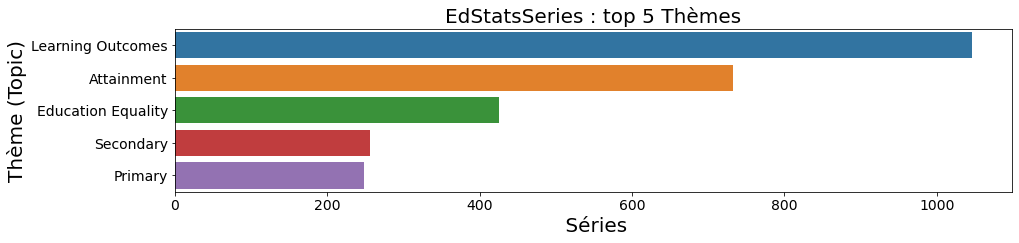

In [128]:
plt.figure(figsize=(15,3))

nb_series_par_theme=EdStatsSeries.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code', ascending=False)
sns.barplot(nb_series_par_theme['Series Code'][:5],nb_series_par_theme['Topic'][:5])
plt.xlabel(' Séries',fontsize=20)
plt.ylabel('Thème (Topic)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('EdStatsSeries : top 5 Thèmes',fontsize=20)

### Conclusion
- Le jeu de données permet de connaître le thème des indicateurs, les descriptions longues et les sources. Il donne des informations sur les indicateurs socio-éduco-économique classés en 37 thèmes.
- Le jeu de données contient 3665 lignes et 21 colonnes.
- Nombre de valeurs manquantes totales 55203 soit 71%.
- Aucun doublon.
- il faudra bien identifier les indicateurs.

## 1.5 EdStatsData

In [40]:
print(f'le jeu de donnees contient {EdStatsData.shape[0]} lignes et {EdStatsData.shape[1]} colonnes')
EdStatsData.head(2)

le jeu de donnees contient 886930 lignes et 70 colonnes


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
EdStatsData.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [42]:
# Desciption des variables qualitatives
EdStatsData.describe(exclude=[np.number])

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Latvia,BRB,PASEC: Mean performance on the reading scale for 6th grade students. Total,BAR.TER.CMPT.6064.ZS
freq,3665,3665,242,242


In [43]:
# Description des variables quantitatives
EdStatsData.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

### Duplications et valeurs manquantes

In [44]:
tot_val = EdStatsData.shape[0]*EdStatsData.shape[1]

print(f'Le total des Valeurs manquantes est {EdStatsData.isna().sum().sum()} \
soit {EdStatsData.isna().sum().sum()/tot_val*100} %')
missVal = pd.DataFrame(EdStatsData.isna().sum(), columns = ['Valeurs manquantes'])
missVal[' % Valeurs manquantes'] = EdStatsData.isna().sum()/EdStatsData.shape[0]*100
missVal

Le total des Valeurs manquantes est 53455179 soit 86.09985165522806 %


,Valeurs manquantes,% Valeurs manquantes
Country Name,0,0.000000
Country Code,0,0.000000
Indicator Name,0,0.000000
Indicator Code,0,0.000000
1970,814642,91.849639
...,...,...
2085,835494,94.200670
2090,835494,94.200670
2095,835494,94.200670
2100,835494,94.200670


### Modification

In [45]:
EdStatsData.drop(columns =['Unnamed: 69'], inplace = True)

### Visualisation

Text(0, 0.5, 'Nombre de données')

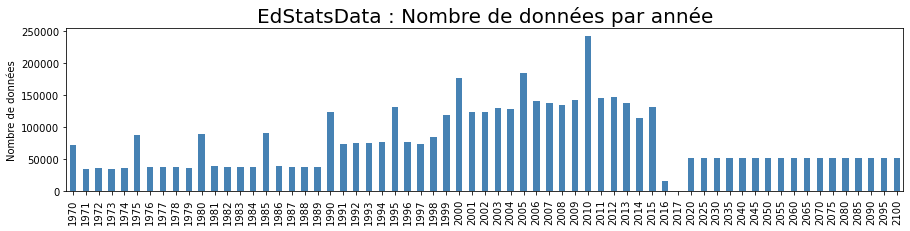

In [132]:

plt.figure(figsize=(15, 3))

present = EdStatsData.loc[:,'1970':'2100'].notnull().sum()
ax1 = present.plot(kind='bar', color='SteelBlue')
ax1.set_title('EdStatsData : Nombre de données par année',fontsize=20)
ax1.set_ylabel('Nombre de données')

### Conclusion 

- la table représente l'evolutions de chaque indicateurs pour chaque pays et zone géographique depuis 1970 - 2017 en plus une projection jusqu'a 2100. 
- Le jeu de données contient 886930 lignes et 70 colonnes.
- Nombre de valeurs manquantes totales : 53455179 NaN pour 61198170 données possibles (**86 %**).


# Deuxieme partie : selection des indicateurs

**Rappel**
- Nous avons vu que les valeurs des indicateurs étaient situés dans EdStatsData.
- Les differentes définitions des indicateurs sont situées dans EdStatsSeries
- EdStatsFootNote contient également plusieurs séries mais leurs définitions ne sont pas indiquées.

Une première étape et d'étudier quels indicateurs sont communs entre ces 3 data-frames.  
Ensuite avant de selectionner des indicateurs pertinents nous allons réduire notre Data-frame en selectionnent les dernières valeurs à partir de 2010 puis garder uniquement les indicateurs présents dans plus de la moitié des pays (Sinon ça ne serait pas représentatifs).
Cette procédure résduira notre jeu de donnée et facilitera la selection des indicateurs. 

## 2.1 Etude des indicateurs

In [47]:
# Examinons les indicateur communs entre les fichiers  : EdStatsData, EdStatsSeries, EdStatsFootNote
print("le nombre d'indictateurs dans EdStatsData est :" )
print(len(set(list(EdStatsData["Indicator Code"].unique()))))
print("les indicteurs présents dans EdStatsData et qui ne sont pas présents dans EdStatsSeries sont aux nombre de : ")
print(len(set(list(EdStatsData["Indicator Code"])) - set(list(EdStatsSeries["Series Code"])) ))
print("les indicteurs présents dans EdStatsData et qui ne sont pas présents dans EdStatsFootNote sont aux nombre de : ")
print(len(set(list(EdStatsData["Indicator Code"])) - set(list(EdStatsFootNote["SeriesCode"])) ))
print("les indicteurs présents dans EdStatsData et qui ne sont pas présents dans EdStatsFootNote \
ni EdStatsSeries dans sont aux nombre de : ")
print(len(set(list(EdStatsData["Indicator Code"])) - set(list(EdStatsFootNote["SeriesCode"])) - set(list(EdStatsSeries["Series Code"])) ))


le nombre d'indictateurs dans EdStatsData est :
3665
les indicteurs présents dans EdStatsData et qui ne sont pas présents dans EdStatsSeries sont aux nombre de : 
53
les indicteurs présents dans EdStatsData et qui ne sont pas présents dans EdStatsFootNote sont aux nombre de : 
2196
les indicteurs présents dans EdStatsData et qui ne sont pas présents dans EdStatsFootNote ni EdStatsSeries dans sont aux nombre de : 
10


Nous remarquons en particulier que 98.5 %  (100 - 53*100/3665) des indicateurs présents dans EdStatsData le sont également dans EdStatsSeries. Donc nous aurons accès à l'énorme majorité des définitions.

### Une étude des remplissage des indicateurs par pays. 

Nous voulons ici avoir une réprésentation du taux de remplissage des indicateurs par pays sur la période 1970-2016. 
L'objectif est donc de savoir combien (en %) de pays  sont représentés au moins une fois par un indicateur.
Pour rappel il y a : 240 pays et 3665 indicateurs 


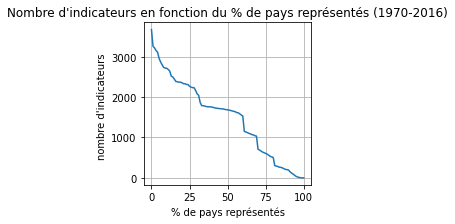

le nombre d'indicateurs présents dans au moins 50% de pays est : 
0
le nombre d'indicateurs présents dans au moins 80% de pays est : 
0


In [137]:
# Nous gardons seulement les colones utiles
anne_loc = np.arange(1970,2017)
anne_loc = [str(x) for x in anne_loc ]
anne_loc.append('Country Name')
anne_loc.append('Indicator Code')
# on vient chercher ces colonnes dans EdStatsData
EdStatsData_taux_indicateur = EdStatsData[anne_loc]
# on supprime les lignes avec que des NaN : 2016 - 1970  (les autres colonnes Country et Indicator sont remplies)
EdStatsData_taux_indicateur = EdStatsData_taux_indicateur.dropna(thresh=3)
# on regroupe par Indicator Code et on compte les Country Name * 100 / nombre de pays
representativite_indicator = EdStatsData_taux_indicateur.groupby('Indicator Code')['Country Name'].count()/240.*100.
# nous trions les valeurs et supprimons le nom des indicateur car inutiles
representativite_indicator = representativite_indicator.reset_index().drop(columns = ['Indicator Code'])
# certains indicateurs ont était suprimés, il faut tout de même les ajouter à notre série, quitte à les mettre à 0.
representativite_indicator = representativite_indicator['Country Name']

for i in range(3665 - len(representativite_indicator)):
    rang = len(representativite_indicator)
    representativite_indicator[rang] = 0
    

    
    
repartition1970 = [0]*101
for i in range(101):
    repartition1970[i] = len(representativite_indicator[representativite_indicator>=i])

fig, ax = plt.subplots(figsize=(3, 3))

t = np.arange(0, 101)

ax.plot(t, repartition1970)

ax.set(xlabel='% de pays représentés', ylabel = "nombre d'indicateurs ",
       title="Nombre d'indicateurs en fonction du % de pays représentés (1970-2016)" )
ax.grid()

fig.savefig("test.png")
plt.show()

print("le nombre d'indicateurs présents dans au moins 50% de pays est : ")
print(repartition[50])
print("le nombre d'indicateurs présents dans au moins 80% de pays est : ")
print(repartition[80])

### Même procédé mais pour la plage (2010-2016)

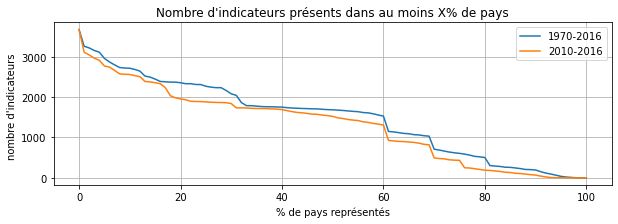

le nombre d'indicateurs présents dans au moins 50% de pays est : 
1522
le nombre d'indicateurs présents dans au moins 80% de pays est : 
192


In [142]:
# Nous gardons seulement les colones utiles
anne_loc = np.arange(2010,2017)
anne_loc = [str(x) for x in anne_loc ]
anne_loc.append('Country Name')
anne_loc.append('Indicator Code')
# on vient chercher ces colonnes dans EdStatsData
EdStatsData_taux_indicateur = EdStatsData[anne_loc]
# on supprime les lignes avec que des NaN : 2016 - 1970  (les autres colonnes Country et Indicator sont remplies)
EdStatsData_taux_indicateur = EdStatsData_taux_indicateur.dropna(thresh=3)
# on regroupe par Indicator Code et on compte les Country Name * 100 / nombre de pays
representativite_indicator = EdStatsData_taux_indicateur.groupby('Indicator Code')['Country Name'].count()/240.*100.
# nous trions les valeurs et supprimons le nom des indicateur car inutiles
representativite_indicator = representativite_indicator.reset_index().drop(columns = ['Indicator Code'])
# certains indicateurs ont était suprimés, il faut tout de même les ajouter à notre série, quitte à les mettre à 0.
representativite_indicator = representativite_indicator['Country Name']

for i in range(3665 - len(representativite_indicator)):
    rang = len(representativite_indicator)
    representativite_indicator[rang] = 0
    

    
    
repartition = [0]*101
for i in range(101):
    repartition[i] = len(representativite_indicator[representativite_indicator>=i])

fig, ax = plt.subplots(figsize=(10, 3))
t = np.arange(0, 101)

ax.plot(t, repartition1970, label = '1970-2016')
ax.plot(t, repartition, label = '2010-2016')


ax.set(xlabel='% de pays représentés', ylabel = "nombre d'indicateurs ",
       title="Nombre d'indicateurs présents dans au moins X% de pays" )
ax.grid()

fig.savefig("test.png")
plt.legend()
plt.show()

print("le nombre d'indicateurs présents dans au moins 50% de pays est : ")
print(repartition[50])
print("le nombre d'indicateurs présents dans au moins 80% de pays est : ")
print(repartition[80])

## 2.2 Reduction temporelle du data frame EdStatsData

A partie de EdStatsData nous gardons uniquement les valeurs conprises entre 2010 et 2016 afin d'avoir des données pertinantes

In [50]:
data = EdStatsData
for i in data.columns[4:]:
    if (int(i)<2010) or (int(i)>2016):
        data = data.drop(i, 1)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN


On supprime ensuite les lignes qui ne contiennes que des NaN entre 2010 et 2016

In [51]:
# Nous savons en effet grace à la découverte des données que les 4 premières collones sont remplies
data = data.dropna(thresh=7)


On garde ensuite uniquement les dernières valeurs sur cette période

In [52]:
# Les colones entre 2010 et 2016
last_val = data['2016'].copy()

for i in range(len(last_val)):
    if np.isnan(last_val.iloc[i]):
        last_val.iloc[i] = data['2015'].iloc[i]
        if np.isnan(last_val.iloc[i]):
            last_val.iloc[i] = data['2014'].iloc[i]
            if np.isnan(last_val.iloc[i]):
                last_val.iloc[i] = data['2013'].iloc[i]
                if np.isnan(last_val.iloc[i]):
                    last_val.iloc[i] = data['2012'].iloc[i]
                    if np.isnan(last_val.iloc[i]):
                        last_val.iloc[i] = data['2011'].iloc[i]
                        if np.isnan(last_val.iloc[i]):
                            last_val.iloc[i] = data['2010'].iloc[i]
# Ajout de la colonne au df
data['2010-2016'] = last_val.values

In [53]:
# Supprime les colnes années devenues inutiles
data = data.drop(data.columns[[4,5,6,7,8,9,10]], axis=1)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010-2016
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,85.320152
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,83.820831
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI,0.966200
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,86.753387
12,Arab World,ARB,"Adjusted net intake rate to Grade 1 of primary education, both sexes (%)",UIS.NIRA.1,76.620567


## 2.2 Ajout de certaines caractéristiques
- Nous partons du data frame EdStatsData auquel nous associons pays à leurs régions (présentes dans EdStatsContry). L'idée est d'une part d'avoir les régions facilement accessible, d'autre par les "pays" qui ne sont pas associés à des régions seront supprimés. En effet certain pays "Country Name" EdStatsData ne sont pas des pays mais des régions, ou alors des petites îles.
- L'ajout des incomes group est égalment intéressant


In [54]:
data_base = pd.merge( data , EdStatsContry[['Country Code', 'Region']],how = 'inner', left_on = 'Country Code', right_on = 'Country Code' )
data_base = pd.merge( data_base , EdStatsContry[['Country Code', 'Income Group']] ,how = 'inner', left_on = 'Country Code', right_on = 'Country Code' )
data_base = pd.merge( data_base , EdStatsSeries[['Series Code', 'Long definition']] , left_on = 'Indicator Code', right_on = 'Series Code')

data_base = data_base[data_base['Region'].notna()]



In [55]:
data_base.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2010-2016,Region,Income Group,Series Code,Long definition
25,Albania,ALB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,95.920891,Europe & Central Asia,Upper middle income,SE.PRM.TENR,"Total number of students of the official primary school age group who are enrolled at primary or secondary education, expressed as a percentage of the corresponding population. Divide the total number of students in the official primary school age range who are enrolled in primary or secondary education by the population of the same age group and multiply the result by 100. NERA should be based on total enrolment of the official primary school participation age group in primary and secondary education for all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes (pre-primary education must be excluded). NERA gives more precise measure of the participation of the official primary school age population to the education system (excluding pre-primary education). It reflects the actual level of achievement of the Universal Primary Education (UPE) goal. In fact, while the Net enrolment rate (NER) shows the coverage of pupils in the official primary school age group in the primary education level only, the NERA extends the measure to those of the official primary school age range who have reached secondary education because they might access primary education earlier than the official entrance or they might skip some grades due to their performance. Increasing NERA might mirror improving participation of children in the official primary school age, the decrease of the target population or both. A value of 100% indicates theoretically that the country has accomplished the UPE goal. However, this condition is not sufficient for UPE due to, for example, a high repetition rate, which might lead pupils to dropout after primary school age without completing primary education. The difference between NERA and NER provides a measure of the proportion of children in the official primary age group who are enrolled in secondary education."
26,Algeria,DZA,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,98.813026,Middle East & North Africa,Upper middle income,SE.PRM.TENR,"Total number of students of the official primary school age group who are enrolled at primary or secondary education, expressed as a percentage of the corresponding population. Divide the total number of students in the official primary school age range who are enrolled in primary or secondary education by the population of the same age group and multiply the result by 100. NERA should be based on total enrolment of the official primary school participation age group in primary and secondary education for all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes (pre-primary education must be excluded). NERA gives more precise measure of the participation of the official primary school age population to the education system (excluding pre-primary education). It reflects the actual level of achievement of the Universal Primary Education (UPE) goal. In fact, while the Net enrolment rate (NER) shows the coverage of pupils in the official primary school age group in the primary education level only, the NERA extends the measure to those of the official primary school age range who have reached secondary education because they might access primary education earlier than the official entrance or they might skip some grades due to their performance. Increasing NERA might mirror improving participation of children in the official primary school age, the decrease of the target population or both. A value of 100% indicates theoretically that the country has accomplished the UPE goal. However, this condition is not sufficient for UPE due 

### Nous voulons ensuite conserver uniquement les indicateurs qui sont présent dans plus de la moitier des pays

In [56]:
print(len(data_base['Country Name'].unique()))
print(len(data_base['Indicator Code'].unique()))


214
1371


In [57]:
df_taux_indicateurs = data_base.groupby('Indicator Code')['Country Code'].count()
#recolte du nom des indicateurs
indicateurs_representatifs = df_taux_indicateurs[df_taux_indicateurs>107].index
data_representatifs = data_base[data_base['Indicator Code'].isin(indicateurs_representatifs)]

In [58]:
print(len(data_representatifs['Country Name'].unique()))
print(len(data_representatifs['Indicator Code'].unique()))


214
529


 On peut constater que le nombre de pays représentés n'a pas changer, nous avans en revache obtenu une diminution du nombre d'incateur

## 2.3 Selection des indicateurs pertinents

### Population : cible d'une population jeune mot clés 10 et 24

In [59]:
liste_mot_cle_10=[row for row in data_representatifs['Indicator Code'] if ('10') in row]
data_representatifs[data_representatifs['Indicator Code'].isin(liste_mot_cle_10)][['Indicator Code','Indicator Name','Long definition']].drop_duplicates()

,Indicator Code,Indicator Name,Long definition
60824,SP.POP.AG10.FE.UN,"Population, age 10, female","Age population, female refers to female population at the specified age level, as estimated by the UNESCO Institute for Statistics."
61005,SP.POP.AG10.MA.UN,"Population, age 10, male","Population, age 10, male refers to the male population at the specified age."
61186,SP.POP.AG10.TO.UN,"Population, age 10, total","Age population, total refers to total population at the specified age level, as estimated by the UNESCO Institute for Statistics."
73856,SP.POP.1014.FE.UN,"Population, ages 10-14, female","Population, ages 10-14, female is the total number of females age 10-14."
74037,SP.POP.1014.MA.UN,"Population, ages 10-14, male","Population, ages 10-14, male is the total number of males age 10-14."
74218,SP.POP.1014.TO.UN,"Population, ages 10-14, total","Population, ages 10-14, total is the total population age 10-14."
74399,SP.POP.1015.FE.UN,"Population, ages 10-15, female","Population, ages 10-15, female is the total number of females age 10-15."
74580,SP.POP.1015.MA.UN,"Population, ages 10-15, male","Population, ages 10-15, male is the total number of males age 10-15."
74761,SP.POP.1015.TO.UN,"Population, ages 10-15, total","Population, ages 10-15, total is the total population age 10-15."
74942,SP.POP.1016.FE.UN,"Population, ages 10-16, female","Population, ages 10-16, female is the total number of females age 10-16."


In [60]:
liste_mot_cle_15=[row for row in data_representatifs['Indicator Code'] if ('15') in row]
data_representatifs[data_representatifs['Indicator Code'].isin(liste_mot_cle_15)][['Indicator Code','Indicator Name','Long definition']].drop_duplicates()

,Indicator Code,Indicator Name,Long definition
39760,SP.POP.1564.TO.ZS,"Population, ages 15-64 (% of total)","Total population between the ages 15 to 64 as a percentage of the total population. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship."
39978,SP.POP.1564.FE.IN,"Population, ages 15-64, female","Female population between the ages 15 to 64. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship."
40196,SP.POP.1564.MA.IN,"Population, ages 15-64, male","Male population between the ages 15 to 64. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship."
40414,SP.POP.1564.TO,"Population, ages 15-64, total","Total population between the ages 15 to 64. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship."
63539,SP.POP.AG15.FE.UN,"Population, age 15, female","Age population, female refers to female population at the specified age level, as estimated by the UNESCO Institute for Statistics."
63720,SP.POP.AG15.MA.UN,"Population, age 15, male","Population, age 15, male refers to the male population at the specified age."
63901,SP.POP.AG15.TO.UN,"Population, age 15, total","Age population, total refers to total population at the specified age level, as estimated by the UNESCO Institute for Statistics."
74399,SP.POP.1015.FE.UN,"Population, ages 10-15, female","Population, ages 10-15, female is the total number of females age 10-15."
74580,SP.POP.1015.MA.UN,"Population, ages 10-15, male","Population, ages 10-15, male is the total number of males age 10-15."
74761,SP.POP.1015.TO.UN,"Population, ages 10-15, total","Population, ages 10-15, total is the total population age 10-15."


### indicateur démographique retenus : 
#### SP.POP.1015.TO.UN 
#### SP.POP.1524.TO.UN
Pour etimer la demande dans le supérieur ( Décalage de 5 à 10 ans avec 2021)
#### SP.POP.0710.TO.UN
Pour etimer la demande pour les lycées ( Décalage de 5 à 10 ans avec 2021)

### Etudiants niveau lycée "SEC"

#### SE.SEC.ENRR	
Total enrollment in secondary education, regardless of age, expressed as a percentage of the population of official secondary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.
#### SE.SEC.ENRR.LO
Total enrollment in lower secondary education, regardless of age, expressed as a percentage of the total population of official lower secondary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.

In [61]:

liste_mot_cle_sec=[row for row in data_representatifs['Indicator Code'] if ('SEC') in row]
data_representatifs[data_representatifs['Indicator Code'].isin(liste_mot_cle_sec)][['Indicator Code','Indicator Name','Long definition']].drop_duplicates()

,Indicator Code,Indicator Name,Long definition
2136,SE.SEC.PROG.ZS,"Effective transition rate from primary to lower secondary general education, both sexes (%)","Number of students admitted to the first grade of a higher level of education in a given year, expressed as a percentage of the number of students enrolled in the final grade of the lower level of education in the previous year. Divide the number of new entrants in the first grade of the specified higher cycle or level of education by the number of pupils who were enrolled in the final grade of the preceding cycle or level of education in the previous school year, and multiply by 100. High transition rates indicate a high level of access or transition from one level of education to the next. They also reflect the intake capacity of the next level of education. Inversely, low transition rates can signal problems in the bridging between two cycles or levels of education, due to either deficiencies in the examination system, or inadequate admission capacity in the higher cycle or level of education, or both. This indicator can be distorted by incorrect distinction between new entrants and repeaters, especially in the first grade of the specified higher level of education. Students who interrupted their studies for one or more years after having completed the lower level of education, together with the migrant students, could also affect the quality of this indicator."
6720,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (number)",Total number of students enrolled at public and private secondary education institutions regardless of age.
6900,SE.SEC.ENRL.FE,"Enrolment in secondary education, female (number)",Total number of female students enrolled at public and private secondary education institutions regardless of age.
7240,SE.SEC.ENRL.GC,"Enrolment in secondary general, both sexes (number)",Total number of students enrolled in general programmes at public and private secondary education institutions regardless of age.
7432,SE.SEC.ENRL.GC.FE,"Enrolment in secondary general, female (number)",Total number of female students enrolled in general programmes at public and private secondary education institutions regardless of age.
7623,SE.SEC.ENRL.VO,"Enrolment in secondary vocational, both sexes (number)","Total number of students enrolled in vocational programmes at public and private secondary education institutions. Vocational education is designed for learners to acquire the knowledge, skills and competencies specific to a particular occupation or trade or class of occupations or trades. Vocational education may have work-based components (e.g. apprenticeships). Successful completion of such programmes leads to labour-market relevant vocational qualifications acknowledged as occupationally-oriented by the relevant national authorities and/or the labour market."
7787,SE.SEC.ENRL.VO.FE,"Enrolment in secondary vocational, female (number)","Total number of female students enrolled in vocational programmes at public and private secondary education institutions. Vocational education is designed for learners to acquire the knowledge, skills and competencies specific to a particular occupation or trade or class of occupations or trades. Vocational education may have work-based components (e.g. apprenticeships). Successful completion of such programmes leads to labour-market relevant vocational qualifications acknowledged as occupationally-oriented by the relevant national authorities and/or the labour market."
12494,SE.SEC.ENRR.LO,"Gross enrolment ratio, lower secondary, both sexes (%)","Total enrollment in lower secondary education, regardless of age, expressed as a percentage of the total population of official lower secondary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition."
12682,SE.SEC.ENRR.LO.FE,"Gross enrolment ratio, lower secondary, female (%)","Total fema

### Etudiant niveau supérieur
#### SE.TER.ENRR 
Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.

In [62]:
liste_mot_cle_ter=[row for row in data_representatifs['Indicator Code'] if ('TER') in row]
data_representatifs[data_representatifs['Indicator Code'].isin(liste_mot_cle_ter)][['Indicator Code','Indicator Name','Long definition']].drop_duplicates()

,Indicator Code,Indicator Name,Long definition
7948,SE.TER.ENRL,"Enrolment in tertiary education, all programmes, both sexes (number)",The total number of students enrolled at public and private tertiary education institutions.
8116,SE.TER.ENRL.FE,"Enrolment in tertiary education, all programmes, female (number)",The total number of female students enrolled at public and private tertiary education institutions.
16805,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)","Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving."
16967,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)","Total female enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total female population of the five-year age group following on from secondary school leaving."
17127,SE.ENR.TERT.FM.ZS,"Gross enrolment ratio, tertiary, gender parity index (GPI)","Ratio of female gross enrolment ratio for tertiary to male gross enrolment ratio for tertiary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
17287,SE.TER.ENRR.MA,"Gross enrolment ratio, tertiary, male (%)","Total male enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total male population of the five-year age group following on from secondary school leaving."
30058,SE.TER.ENRL.FE.ZS,Percentage of students in tertiary education who are female (%),Number of female students at the tertiary education level (ISCED 5 to 8) expressed as a percentage of the total number of students (male and female) at the tertiary education level (ISCED 5 to 8) in a given school year.
35670,SP.TER.TOTL.IN,"Population of the official age for tertiary education, both sexes (number)",Population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.
35876,SP.TER.TOTL.FE.IN,"Population of the official age for tertiary education, female (number)",Female population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.
36082,SP.TER.TOTL.MA.IN,"Population of the official age for tertiary education, male (number)",Male population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.


### Utilisation d'internet
#### IT.NET.USER.P2

In [63]:
liste_mot_cle_it=[row for row in data_representatifs['Indicator Code'] if ('IT') in row]
data_representatifs[data_representatifs['Indicator Code'].isin(liste_mot_cle_it)][['Indicator Code','Indicator Name','Long definition']].drop_duplicates()

,Indicator Code,Indicator Name,Long definition
19142,IT.NET.USER.P2,Internet users (per 100 people),"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc."


## Indicateurs economique
### NY.GDP.PCAP.CD
def = pib par habitant

In [64]:
liste_mot_cle_ny = [row for row in data_representatifs['Indicator Code'] if ('NY') in row ]
data_representatifs[data_representatifs['Indicator Code'].isin(liste_mot_cle_ny)][['Indicator Code','Indicator Name','Long definition']].drop_duplicates()

,Indicator Code,Indicator Name,Long definition
9897,NY.GDP.MKTP.KD,GDP at market prices (constant 2005 US$),"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars. Dollar figures for GDP are converted from domestic currencies using 2010 official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
10118,NY.GDP.MKTP.CD,GDP at market prices (current US$),"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
10343,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$),GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars.
10564,NY.GDP.PCAP.CD,GDP per capita (current US$),GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.
10789,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 international $)",GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2011 international dollars.
11002,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)",GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current international dollars based on the 2011 ICP round.
11215,NY.GDP.MKTP.PP.KD,"GDP, PPP (constant 2011 international $)",PPP GDP is gross domestic product converted to international dollars using purchasing 

## Conclusion 
Nous avons indentifié 8 indicateurs à la fois représentatifs et pertinents selon 4 catégories : 
- Démographique : *SP.POP.0710.TO.UN* *SP.POP.1015.TO.UN* *SP.POP.1524.TO.UN*
- Scolaire : *SE.SEC.ENRR* *SE.SEC.ENRR.LO* *SE.TER.ENRR*
- Tecnologique : *IT.NET.USER.P2*
- Economiques : *NY.GDP.PCAP.CD*


# Troisième partie : Construction des scores
### Certain pays n'ont pas les 8 indicateurs : 

In [65]:
serie_code_pertinent = ['SP.POP.1015.TO.UN','SP.POP.0710.TO.UN','SP.POP.1524.TO.UN','SE.TER.ENRR','SE.SEC.ENRR','SE.SEC.ENRR.LO','IT.NET.USER.P2', 'NY.GDP.PCAP.CD']
data_representatifs_pertinents = data_representatifs[data_representatifs['Indicator Code'].isin(serie_code_pertinent)].copy()

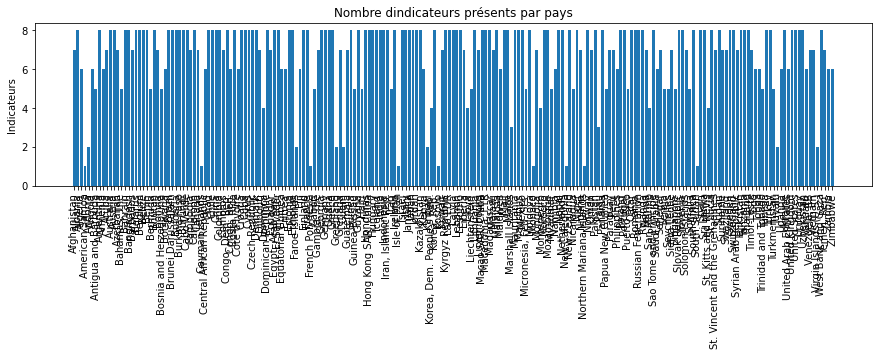

In [182]:
nb_idic_pays = data_representatifs_pertinents.groupby("Country Name")["Indicator Code"].count()
plt.figure(figsize=(15, 3))
plt.bar(nb_idic_pays.index, nb_idic_pays.values)
plt.xticks(rotation = 90)
plt.title('Nombre dindicateurs présents par pays')
plt.ylabel('Indicateurs')
plt.show()

### On garde les pays avec au moins 5 indicateurs 

In [67]:
liste_pays_4 = nb_idic_pays[nb_idic_pays>4].index

In [68]:
data_representatifs_pertinents_4 = data_representatifs_pertinents[data_representatifs['Country Name'].isin(liste_pays_4)].copy()

<ipython-input-68-e99a9093ba7c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_representatifs_pertinents_4 = data_representatifs_pertinents[data_representatifs['Country Name'].isin(liste_pays_4)].copy()


In [69]:
data_representatifs_pertinents_4["Country Name"].unique().shape

(185,)

Suite à l'éliminations des pays ne contenant pas assés d'information in nous reste 185 pays

### Etude des Statistique des indicateurs 

In [154]:
df = pd.DataFrame( index = data_representatifs_pertinents_4["Country Name"].unique(), columns = serie_code_pertinent)
df.fillna(-1, inplace=True)
df = df.stack()
df = pd.DataFrame( index = df.index, columns = ["Dernière valeurs 2010-2016"])
df.index.names = ['Country Name','Indicator Code']
df = pd.merge(df, data_representatifs_pertinents_4.groupby(["Country Name","Indicator Code"]).sum()\
              , left_index=True, right_index=True, how = "outer")
df = df.drop('Dernière valeurs 2010-2016', 1)
df = df.unstack()

<ipython-input-176-e4a0cff462df>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax, bins = 50)


array([[<AxesSubplot:title={'center':"('2010-2016', 'IT.NET.USER.P2')"}>,
        <AxesSubplot:title={'center':"('2010-2016', 'NY.GDP.PCAP.CD')"}>,
        <AxesSubplot:title={'center':"('2010-2016', 'SE.SEC.ENRR')"}>],
       [<AxesSubplot:title={'center':"('2010-2016', 'SE.SEC.ENRR.LO')"}>,
        <AxesSubplot:title={'center':"('2010-2016', 'SE.TER.ENRR')"}>,
        <AxesSubplot:title={'center':"('2010-2016', 'SP.POP.0710.TO.UN')"}>],
       [<AxesSubplot:title={'center':"('2010-2016', 'SP.POP.1015.TO.UN')"}>,
        <AxesSubplot:title={'center':"('2010-2016', 'SP.POP.1524.TO.UN')"}>,
        <AxesSubplot:>]], dtype=object)

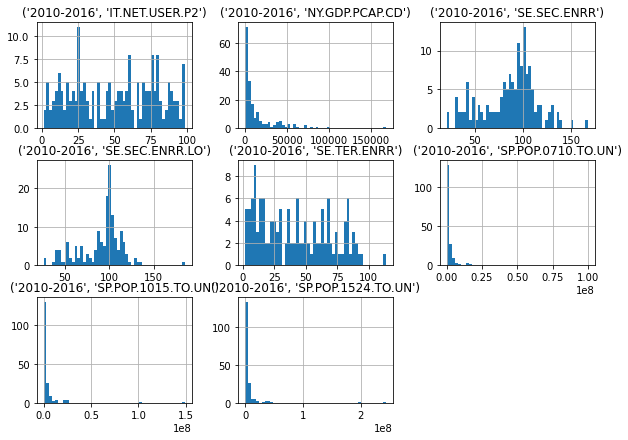

In [176]:
# Répartition des valeurs
fig = plt.figure(figsize = (10,7))
ax = fig.gca()
df.hist(ax = ax, bins = 50)

In [171]:
# Statistiques descriptives
pd.DataFrame(df.mean(), columns = ['moyenne'])

moyenne
          Indicator Code                 
2010-2016 IT.NET.USER.P2     5.013821e+01
          NY.GDP.PCAP.CD     1.434233e+04
          SE.SEC.ENRR        8.656679e+01
          SE.SEC.ENRR.LO     9.095767e+01
          SE.TER.ENRR        4.170360e+01
          SP.POP.0710.TO.UN  2.771086e+06
          SP.POP.1015.TO.UN  4.056589e+06
          SP.POP.1524.TO.UN  6.700539e+06

In [174]:
pd.DataFrame(df.std(), columns = ['Ecart type'])

Ecart type
          Indicator Code                 
2010-2016 IT.NET.USER.P2     2.844775e+01
          NY.GDP.PCAP.CD     2.202263e+04
          SE.SEC.ENRR        2.822941e+01
          SE.SEC.ENRR.LO     2.423526e+01
          SE.TER.ENRR        2.818212e+01
          SP.POP.0710.TO.UN  9.354284e+06
          SP.POP.1015.TO.UN  1.402581e+07
          SP.POP.1524.TO.UN  2.417073e+07

### Nous voulons ensuite créer un data frame avec comme index les pays et tous les indicateurs en colonne

### 3.1 Remplissage des valeurs manquantes

- Le tableau comporte logiquement des NaN, comme solution pour les remplacer nous choisissons alors de remplacer les valeurs manquantes par les valeurs médianes par région  
Utiliser la médiane est plus judicieux qu'utiliser la moyenne car celle-ci ne prend pas en compte les valeurs extrèmes  
Pour réaliser cette opération nous allons dans premier temps créer un data-frame permetant de relier simplement les pays aux régions

1) Calcul de la médiane par région : 

In [71]:
# Calcul de la médiane par région : 
med_region = data_representatifs_pertinents_4.groupby(['Region','Indicator Code'])['2010-2016'].median()
# Accéder simplement aux régions
Pays_to_region = data_representatifs_pertinents_4[['Country Name','Region']].drop_duplicates()

In [72]:
# remplacement des valeurs manquantes avec la mediane :
for i in  data_representatifs_pertinents_4["Country Name"].unique():
    #print(i)
    for j in serie_code_pertinent:
        #print(j)
        #print(pd.isna(ok.loc[i,j].values[0]))
        if pd.isna(df.loc[i,j].values[0]) :
            #print(Pays_to_region[Pays_to_region['Country Name']==i]['Region'].values[0])
            regionn = Pays_to_region[Pays_to_region['Country Name']==i]['Region'].values[0]
            df.loc[i,j].values[0] = med_region.loc[regionn,j]

In [73]:
df.unstack().head(4)

2010-2016                                            \
Indicator Code IT.NET.USER.P2 NY.GDP.PCAP.CD SE.SEC.ENRR SE.SEC.ENRR.LO   
Country Name                                                              
Afghanistan         10.595726     561.778746   55.644409      67.447617   
Albania             66.363445    4124.982390   95.765488     101.488373   
Algeria             42.945527    3916.881571   87.153191      98.604233   
Angola              13.000000    3308.700233   42.974360      54.439701   

                                                                \
Indicator Code SE.TER.ENRR SP.POP.0710.TO.UN SP.POP.1015.TO.UN   
Country Name                                                     
Afghanistan      14.190375         4013077.0         5366600.0   
Albania          58.109951          198740.0          298235.0   
Algeria          36.922279         2668021.0         3715833.0   
Angola            9.308020         2386666.0         3157540.0   

                                  
Indicator Code SP.POP.1524.TO.UN  
Country Name                      
Afghanistan            7252785.0  
Albania                 556269.0  
Algeria                6467818.0  
Angola                 4259352.0

## 3.2 homogénéisation des valeurs 

- Certaines valeurs ne sont pas de pourcentages mais des valeurs absolues : NY.GDP.PCAP.CD, SP.POP.0710.TO.UN SP.POP.1015.TO.UN SP.POP.1524.TO.UN.  
Nous construisons alors une fonction qui découpe les valeurs en 20 tranches homgènes. Et associe à chaque valeur un rang entre 5 et 100 (de 5 en 5). Plusieurs options étaient disponibles ici, mais celle-ci à l'avantage de ne pas trop écraser les valeurs moyennes.

In [74]:
def quantile_param(serie,n_tranches = 20.0):
    val_quant = np.zeros(int(n_tranches)+1)
    resultat = serie.copy()
    
    for i in range(int(n_tranches)):
        val_quant[i+1] = serie.quantile(q=(float(i+1)/n_tranches))
        
    for pays in serie.index:
        for j in range(int(n_tranches)):
            if val_quant[j]<=serie[pays]<=val_quant[j+1]:
                resultat[pays] = 5*(j+1)
    return resultat

In [75]:
df_score = df.unstack()

df_score['2010-2016','NY.GDP.PCAP.CD'] =\
quantile_param(df.unstack()['2010-2016','NY.GDP.PCAP.CD'],20.0)

df_score['2010-2016','SP.POP.0710.TO.UN'] =\
quantile_param(df.unstack()['2010-2016','SP.POP.0710.TO.UN'],20.0)

df_score['2010-2016','SP.POP.1015.TO.UN'] =\
quantile_param(df.unstack()['2010-2016','SP.POP.1015.TO.UN'],20.0)

df_score['2010-2016','SP.POP.1524.TO.UN'] =\
quantile_param(df.unstack()['2010-2016','SP.POP.1524.TO.UN'],20.0)



In [76]:
df_score.head(4)

2010-2016                                            \
Indicator Code IT.NET.USER.P2 NY.GDP.PCAP.CD SE.SEC.ENRR SE.SEC.ENRR.LO   
Country Name                                                              
Afghanistan         10.595726           10.0   55.644409      67.447617   
Albania             66.363445           45.0   95.765488     101.488373   
Algeria             42.945527           45.0   87.153191      98.604233   
Angola              13.000000           40.0   42.974360      54.439701   

                                                                \
Indicator Code SE.TER.ENRR SP.POP.0710.TO.UN SP.POP.1015.TO.UN   
Country Name                                                     
Afghanistan      14.190375              90.0              90.0   
Albania          58.109951              30.0              30.0   
Algeria          36.922279              85.0              85.0   
Angola            9.308020              80.0              80.0   

                                  
Indicator Code SP.POP.1524.TO.UN  
Country Name                      
Afghanistan                 85.0  
Albania                     30.0  
Algeria                     85.0  
Angola                      75.0

## 3.3 Choix des Coeficients 
- Pour nos 4 catégories d'indicateur nous déterminons les coefficients de la mamière suivante :
- La somme des coefficients par catégories et de 5. Nous ajustons ensuite les coefficients dans une catégorie donnée suivant leur pertinance avec la problèmatique 

In [77]:
ind_ = [('Technologique', 'IT.NET.USER.P2'),
 ('Economique', 'NY.GDP.PCAP.CD'),
 ('Education', 'SE.SEC.ENRR'),
 ('Education', 'SE.SEC.ENRR.LO'),
 ('Education', 'SE.TER.ENRR'),
 ('Démographique', 'SP.POP.0710.TO.UN'),
 ('Démographique', 'SP.POP.1015.TO.UN'),
 ('Démographique', 'SP.POP.1524.TO.UN')]
va_coef = np.array([5, 5, 2, 1, 2, 2, 2, 1])
index = pd.MultiIndex.from_tuples(ind_, names=["Catégorie", "Indicateur"])
s = pd.DataFrame(va_coef, index=index, columns=["Coefficient"])
s

Coefficient
Catégorie     Indicateur                    
Technologique IT.NET.USER.P2               5
Economique    NY.GDP.PCAP.CD               5
Education     SE.SEC.ENRR                  2
              SE.SEC.ENRR.LO               1
              SE.TER.ENRR                  2
Démographique SP.POP.0710.TO.UN            2
              SP.POP.1015.TO.UN            2
              SP.POP.1524.TO.UN            1

## 3.4 Score final par Pays et Région

In [183]:
s_it = df_score['2010-2016','IT.NET.USER.P2'] 
s_ny = df_score['2010-2016','NY.GDP.PCAP.CD'] 
s_se = df_score['2010-2016','SE.SEC.ENRR'] 
s_sel= df_score['2010-2016','SE.SEC.ENRR.LO'] 
s_ste = df_score['2010-2016','SE.TER.ENRR'] 
s_sp07 = df_score['2010-2016','SP.POP.0710.TO.UN']
s_sp10 =df_score['2010-2016','SP.POP.1015.TO.UN'] 
s_sp15 = df_score['2010-2016','SP.POP.1524.TO.UN'] 

score_final = 5*s_ny + 5*s_it + s_sel + 2*(s_ste+s_se) + 2*(s_sp07 + s_sp10) + s_sp15

#### Top 10 du score final :

In [186]:
score_final.sort_values(ascending=False)[:10]

Country Name
United States     1849.663066
United Kingdom    1830.169256
Australia         1798.923393
Japan             1797.492867
Netherlands       1791.484436
Belgium           1790.811367
Germany           1771.567534
Spain             1765.700105
Korea, Rep.       1760.979822
France            1760.833130
dtype: float64

In [189]:
pd.DataFrame(score_final.sort_values(ascending=False)[:10], columns = ['Score'])

,Score
Country Name,
United States,1849.663066
United Kingdom,1830.169256
Australia,1798.923393
Japan,1797.492867
Netherlands,1791.484436
Belgium,1790.811367
Germany,1771.567534
Spain,1765.700105
"Korea, Rep.",1760.979822


In [80]:
score_final

Country Name
Afghanistan             755.095817
Albania                1116.056474
Algeria                1211.482807
Angola                  819.004459
Antigua and Barbuda    1364.146530
                          ...     
Vietnam                1202.529049
West Bank and Gaza     1068.860895
Yemen, Rep.             885.600681
Zambia                  744.377662
Zimbabwe                722.854906
Length: 185, dtype: float64

In [81]:
Pays_to_region_score = Pays_to_region.copy()

In [82]:
Pays_to_region_score = Pays_to_region_score.set_index('Country Name')

In [83]:
Pays_to_region

,Country Name,Region
10564,Afghanistan,South Asia
10565,Albania,Europe & Central Asia
10566,Algeria,Middle East & North Africa
10569,Angola,Sub-Saharan Africa
10570,Antigua and Barbuda,Latin America & Caribbean
...,...,...
10762,Zambia,Sub-Saharan Africa
10763,Zimbabwe,Sub-Saharan Africa
12498,Aruba,Latin America & Caribbean
12540,Eritrea,Sub-Saharan Africa


In [84]:
Pays_to_region_score['Score Final'] = np.zeros(len(Pays_to_region_score))

In [85]:
for i in Pays_to_region["Country Name"]:
    Pays_to_region_score.loc[i,'Score Final'] = score_final.loc[i]

In [86]:
Pays_to_region_score

,Region,Score Final
Country Name,,
Afghanistan,South Asia,755.095817
Albania,Europe & Central Asia,1116.056474
Algeria,Middle East & North Africa,1211.482807
Angola,Sub-Saharan Africa,819.004459
Antigua and Barbuda,Latin America & Caribbean,1364.146530
...,...,...
Zambia,Sub-Saharan Africa,744.377662
Zimbabwe,Sub-Saharan Africa,722.854906
Aruba,Latin America & Caribbean,1164.187014


In [87]:
Pays_to_region_score.groupby('Region')['Score Final'].mean()

Region
East Asia & Pacific           1160.295315
Europe & Central Asia         1406.400509
Latin America & Caribbean     1165.374409
Middle East & North Africa    1216.600011
North America                 1769.050955
South Asia                     907.153016
Sub-Saharan Africa             692.868076
Name: Score Final, dtype: float64

In [88]:
Pays_to_region_score[Pays_to_region_score['Region'] == 'North America']

,Region,Score Final
Country Name,,
Bermuda,North America,1748.448521
Canada,North America,1709.041280
United States,North America,1849.663066


C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Moyenne des scores par région')

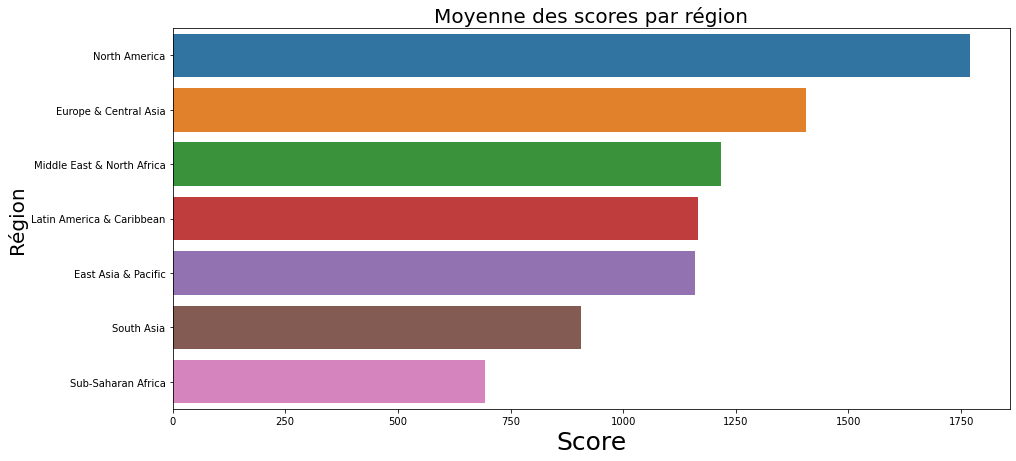

In [89]:
plt.figure(figsize=(15,7))

score_par_region=Pays_to_region_score.groupby('Region')[['Score Final']].mean().reset_index().sort_values(by='Score Final', ascending=False)
sns.barplot(score_par_region['Score Final'], score_par_region['Region'])
plt.xlabel('Score',fontsize=25)
plt.ylabel('Région',fontsize=20)
plt.title('Moyenne des scores par région',fontsize=20)

In [190]:
score_par_region=Pays_to_region_score.groupby('Region')[['Score Final']].mean().reset_index().sort_values(by='Score Final', ascending=False)
score_par_region.set_index(['Region'])

,Score Final
Region,
North America,1769.050955
Europe & Central Asia,1406.400509
Middle East & North Africa,1216.600011
Latin America & Caribbean,1165.374409
East Asia & Pacific,1160.295315
South Asia,907.153016
Sub-Saharan Africa,692.868076
